In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [165]:
# Load the dataset
dataFrame = pd.read_csv('./data/train_data.csv', delimiter=',')
dataFrame.head()

,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,4,New York City,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,5,New York City,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


In [166]:
# Drop non-attribute columns
patients_X = dataFrame.drop(['ID', 'HealthServiceArea', 'LengthOfStay'], axis=1)

In [167]:
def f(length_of_stay):
    """
    Classifies length of stay into Class 0 if its < 4 days, or Class 1 otherwise.
    :param length_of_stay: The number of days stayed at hospital.
    :return: integer 0 or 1, representing class 0 or class 1.
    """
    return 0 if length_of_stay < 4 else 1

# Assign column 'LengthOfStay' to Y target.
patients_Y = np.array(list(map(f, dataFrame['LengthOfStay'])))

In [168]:
from sklearn.model_selection import train_test_split

# Split the Data by 20%
with pd.option_context('mode.chained_assignment', None):
    patients_X_train, patients_X_test, patients_y_train, patients_y_test = train_test_split(patients_X, patients_Y, test_size=0.2, shuffle=True)

In [197]:
def hist_plot(title, columns, colours, nrows, ncols, index_pos, left=0.125, top=0.9, bottom=0.1, right=0.9, wspace=0.3, hspace=0.7):
    """

    :param title:     The title of the histogram.
    :param columns:   The data columns to plot on the histogram.
    :param colours:   The colours for each data column on the histogram.
    :param nrows:     The number of rows in the presentation table.
    :param ncols:     The number of columns in the presentation table.
    :param index_pos: The index of the histogram on the
    :param left:      How far to move away from left.
    :param top:       How far to move away from top.
    :param bottom:    How far to extend towards bottom.
    :param right:     How far to extend boundary towards right.
    :param wspace:    Height ratio spacing between plots.
    :param hspace:    Width ratio spacing between plots.
    :return:
    """
    plt.subplot(nrows,ncols,index_pos)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    for index_pos, column in enumerate(columns):
        plt.hist(column, alpha=0.3, color=colours[index_pos % len(colours)], density=True)
    plt.title(title)
    plt.xticks(rotation='vertical')

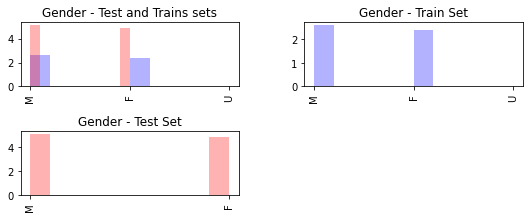

In [198]:
plt.figure(figsize=(9,3))
hist_plot("Gender - Test and Trains sets", [patients_X_train["Gender"], patients_X_test["Gender"]], ['b', 'r'], 1, 3, 1)
hist_plot("Gender - Train Set", [patients_X_train["Gender"]], ['b'], 1, 3, 2)
hist_plot("Gender - Test Set", [patients_X_test["Gender"]], ['r'], 1, 3, 3)

plt.figure(figsize=(9,3))
hist_plot("APRSeverityOfIllnessCode - Test and Trains sets", [patients_X_train["APRSeverityOfIllnessCode"], patients_X_test["APRSeverityOfIllnessCode"]], ['b', 'r'], 1, 3, 1)
hist_plot("APRSeverityOfIllnessCode - Train Set", [patients_X_train["APRSeverityOfIllnessCode"]], ['b'], 1, 3, 2)
hist_plot("APRSeverityOfIllnessCode - Test Set", [patients_X_test["APRSeverityOfIllnessCode"]], ['r'], 1, 3, 3)


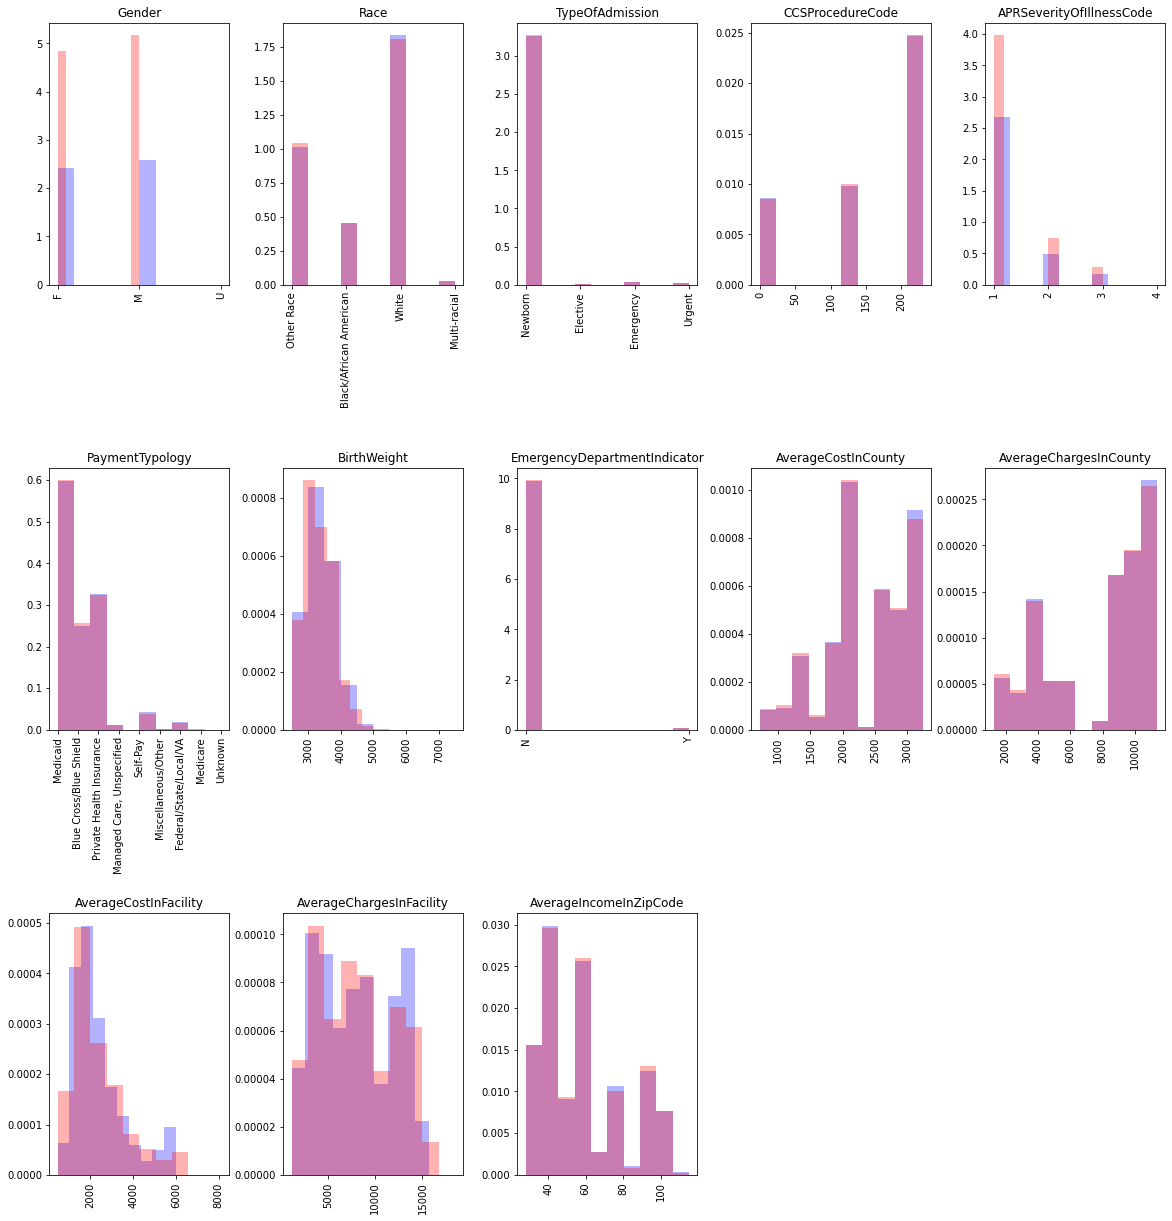

In [172]:
# EDA
plt.figure(figsize=(20,20))
for i, col in enumerate(patients_X_train.columns):
    hist_plot(col, [patients_X_train[col], patients_X_test[col]], ['b', 'r'], 3, 5, i+1)

### Data Fields

| Column   Name                | Attribute/Target |    Type     | Description                                                                                                                                                                                                  |
|------------------------------|------------------|-------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ID                           | N/A              | N/A         | Unique number to represent patients ID                                                                                                                                                                        |
| HealthServiceArea            | N/A              | N/A         | A description of the Health Service Area (HSA) in which the hospital is located. Capital/Adirondack, Central NY, Finger   Lakes, Hudson Valley, Long Island, New York City, Southern Tier, Western NY.       |
| Gender                       | Attribute 1      | Categorical | patients gender:   (M) Male, (F) Female, (U) Unknown.                                                                                                                                                         |
| Race                         | Attribute 2      | Categorical | patients race. Black/African American, Multi, Other Race, Unknown, White. Other Race   includes Native Americans and Asian/Pacific Islander.                                                                  |
| TypeOfAdmission              | Attribute 3      | Categorical | A description of   the manner in which the patients was admitted to the health care facility:   Elective, Emergency, Newborn, Not Available, Trauma, Urgent.                                                  |
| CCSProcedureCode             | Attribute 4      | Categorical | AHRQ Clinical Classification Software (CCS) ICD-9 Procedure Category Code                                                                                                                                    |
| APRSeverityOfIllnessCode     | Attribute 5      | Categorical | All patients  Refined Severity of Illness (APR SOI) Description: Minor (1), Moderate (2),   Major (3), Extreme (4)                                                                                            |
| PaymentTypology              | Attribute 6      | Categorical | A description of the type of payment for this occurrence.                                                                                                                                                    |
| BirthWeight                  | Attribute 7      | Categorical | The neonate birth weight in grams; rounded to nearest 100g.                                                                                                                                                  |
| EmergencyDepartmentIndicator | Attribute 8      | Categorical | Emergency Department Indicator is set based on the submitted revenue codes. If the   record contained an Emergency Department revenue code of 045X, the indicator   is set to "Y", otherwise it will be “N”. |
| AverageCostInCounty          | Attribute 9      | Categorical | Average hospitalization Cost In County of the patients                                                                                                                                                        |
| AverageChargesInCounty       | Attribute 10     | Categorical | Average medical Charges In County of the patients                                                                                                                                                             |
| AverageCostInFacility        | Attribute 11     | Categorical | Average Cost In Facility                                                                                                                                                                                     |
| AverageChargesInFacility     | Attribute 12     | Categorical | Average Charges In Facility                                                                                                                                                                                  |
| AverageIncomeInZipCode       | Attribute 13     | Categorical | Average Income In Zip Code                                                                                                                                                                                   |
| LengthOfStay                 | target           | Categorical | The total number  of patients days at an acute level and/or other than acute care level. Need to be transformed to match the task class 0 id LengthOfStay < 4 and class 1 otherwise                           |


# Questions to Answer
What is the range of some of the attributes?
Which of the features have a very different average to the others?
Which feature is skewed (hint examine the histogram)?
Which features are highly correlated?

### Approach
##### Requirements & Restrictions for this project
To start off there were some requirements and restrictions for project:
xcv

##### Data Exploration
Ordinal categorical features
Nominal categorical features

Continuous Numerical features - Decimal
Discrete numerical features - Integers
##### Evaluation Framework

##### Methodology Selection

##### Hyper Parameter Selection Strategy
Random method, graph method, or the
##### Model Analyses


### Ultimate Judgment & Analysis

